In [45]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('cleaned_data.csv')

In [9]:
# create function that gets the year and month of the invoice, where each date becomes the first day of the month
def get_month(x) : return dt.datetime(x.year,x.month,1)

In [19]:
df.dtypes

Unnamed: 0       int64
invoice          int64
description     object
quantity         int64
invoicedate     object
price          float64
customer_id    float64
country         object
total          float64
dtype: object

In [20]:
# convert invoicedate to pandas datetime type
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [21]:
# create new column with months of the invoice
df['invoice_month'] = df['invoicedate'].apply(get_month)

In [26]:
# group by customers and aggregate in invoice_month 
grouping = df.groupby('customer_id')['invoice_month']

In [33]:
# group customers by the month they made their first purchase
df['cohort_month'] = grouping.transform('min')

This code creates a new DataFrameGroupBy object called `grouping` by grouping the rows of a DataFrame `df` by the `customer_id` column and aggregating the values in the `invoice_month` column. 

The resulting object, `grouping`, contains a separate group for each unique `customer_id` value, with the `invoice_month` column aggregated for each group. 

This means that you can now perform various operations on the `grouping` object, such as calculating summary statistics or applying functions to each group using the `.apply()` method. 

In the context of cohort analysis, this step is typically used to group customers by the month they made their first purchase (the cohort month), which is stored in a new column called `Coh

In [37]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year # get the year
    month = dframe[column].dt.month # get the month
    day = dframe[column].dt.day # get the day
    return year, month , day # what is the df that is being passed here?

invoice_year,invoice_month,_ = get_month_int(df,'invoice_month') # it must be series of the years and monthy
# what about the day, will it not be stored in a variable?
# actually what I want to do is to get the year and the month specifically. what is the difference to the previous lines?
cohort_year,cohort_month,_ = get_month_int(df,'cohort_month')

year_diff = invoice_year - cohort_year 
# that is interesting to understand, what it does and how?!
month_diff = invoice_month - cohort_month 


df['cohort_index'] = year_diff * 12 + month_diff + 1

# so, what we get here, is the distance between months, when a cohort made first purchase and the current month. as we will have several months to compare the behaviour .

This code defines a function called `get_month_int()` that takes two arguments: a DataFrame `dframe` and a string `column` representing the name of a date column in `dframe`. 

The function extracts the year, month, and day components from the specified date column in `dframe`, and returns them as three separate variables.

The next two lines of code extract the year and month components from the `InvoiceMonth` and `CohortMonth` columns of the `df` DataFrame using the `get_month_int()` function, and assigns them to separate variables called `invoice_year`, `invoice_month`, `cohort_year`, and `cohort_month`.

The following two lines of code calculate the difference in years and months between the invoice month and the cohort month for each row in the `df` DataFrame, and assign the results to variables called `year_diff` and `month_diff`.

Finally, the last line of code creates a new column in the `df` DataFrame called `CohortIndex` and assigns to it the result of a calculation that converts the year and month differences into a single integer value representing the number of months between the invoice month and the cohort month. The `+1` at the end of the calculation is added to ensure that the index starts from 1 instead of 0. The resulting `CohortIndex` column represents the number of months between each customer's current purchase and their first purchase (i.e., the cohort month).

so, what we get here, is the distance between months, when a cohort made first purchase and the current month. as we will have several months to compare the behaviour .

In [40]:
#Count monthly active customers from each cohort
grouping = df.groupby(['cohort_month', 'cohort_index'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='cohort_month',columns='cohort_index',values='customer_id')
cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This code calculates the number of monthly active customers from each cohort group, based on the `CohortMonth` and `CohortIndex` columns in the `df` DataFrame.

The first line of code groups the DataFrame `df` by the `CohortMonth` and `CohortIndex` columns, using the `groupby()` method. The resulting `grouping` object is a DataFrameGroupBy object that has grouped the data by the two specified columns.

The second line of code applies the `pd.Series.nunique()` function to the `CustomerID` column within each group of the `grouping` object. This calculates the number of unique customers in each cohort for each month.

The third line of code resets the index of the resulting `cohort_data` DataFrame to separate the `CohortMonth` and `CohortIndex` columns from the `CustomerID` column.

The fourth line of code creates a pivot table from the `cohort_data` DataFrame, with the `CohortMonth` column as the index, the `CohortIndex` column as the columns, and the `CustomerID` column as the values. This pivot table summarizes the number of unique customers in each cohort for each month, and is assigned to the `cohort_counts` variable.

Finally, the `cohort_counts` DataFrame is returned, which contains the number of monthly active customers for each cohort group, organized by the month of their first purchase and the number of months since their first purchase. This information can be used to analyze customer retention and activity patterns over time, and to identify opportunities for improvement in customer engagement and loyalty.



*In other words:*
This code performs cohort analysis on a dataset and counts the number of active customers each month from each cohort. Here's how it works:

1. The code groups the data by both the CohortMonth and CohortIndex columns, which were previously created in the code to label each customer's cohort and their stage in their lifetime.

2. Next, the code uses the `pd.Series.nunique` function to count the number of unique customer IDs in each monthly cohort group. This gives us the number of active customers for each cohort in each month.

3. The resulting data is then reshaped into a pivot table using the `pivot` function, with the CohortMonth column as the index, CohortIndex column as the columns, and the values as the counts of active customers. This makes it easy to see the number of active customers for each cohort and each month.

4. Finally, the resulting pivot table is returned by the function.

In [41]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

cohort_index,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,
2009-12-01,100.0,35.3,33.4,42.5,38.0,35.9,37.7,34.2,33.6,36.2,...,30.3,26.3,30.3,28.3,26.0,25.5,31.5,30.5,40.7,19.7
2010-01-01,100.0,20.6,31.1,30.5,26.4,30.0,25.8,23.0,27.9,31.9,...,15.1,23.5,19.8,18.5,19.6,24.3,19.3,24.5,5.7,NaN
2010-02-01,100.0,23.8,22.5,29.1,24.6,20.1,19.3,28.6,25.4,27.5,...,20.1,16.0,16.3,14.4,23.0,23.0,16.3,5.9,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.2,23.3,20.3,24.6,30.2,27.5,10.8,...,16.9,17.4,15.6,17.6,20.1,21.2,7.9,NaN,NaN,NaN
2010-04-01,100.0,19.4,19.4,16.3,18.4,22.4,27.6,26.2,10.5,10.9,...,15.6,13.9,15.0,18.0,22.4,5.8,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.7,16.9,17.3,17.7,25.6,21.3,12.6,5.9,8.3,...,12.6,13.8,16.5,15.4,4.7,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.4,18.9,20.4,23.0,28.5,12.6,8.9,8.1,11.9,...,12.2,13.3,20.4,5.2,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.6,18.3,29.6,29.0,14.0,11.3,14.5,14.5,11.3,...,17.2,23.7,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.4,29.6,32.1,17.3,11.7,9.9,12.3,13.6,13.0,...,19.8,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This code takes the output of the cohort analysis performed on a dataset and calculates the retention rates for each cohort and each month. Here's how it works:

1. The code first selects the first column of the `cohort_counts` pivot table, which represents the size of each cohort at the beginning of the analysis period.

2. Next, the code divides each value in the `cohort_counts` pivot table by the corresponding cohort size from step 1, row-wise using the `divide` function. This calculates the retention rate for each cohort and each month.

3. The resulting data is then rounded to three decimal places and multiplied by 100 to display the retention rates as percentages.

4. Finally, the resulting retention table is returned by the function. 

The output of this code is a table that shows the retention rates of customers for each cohort and each month, with the cells representing the percentage of customers from each cohort who remained active in subsequent months.

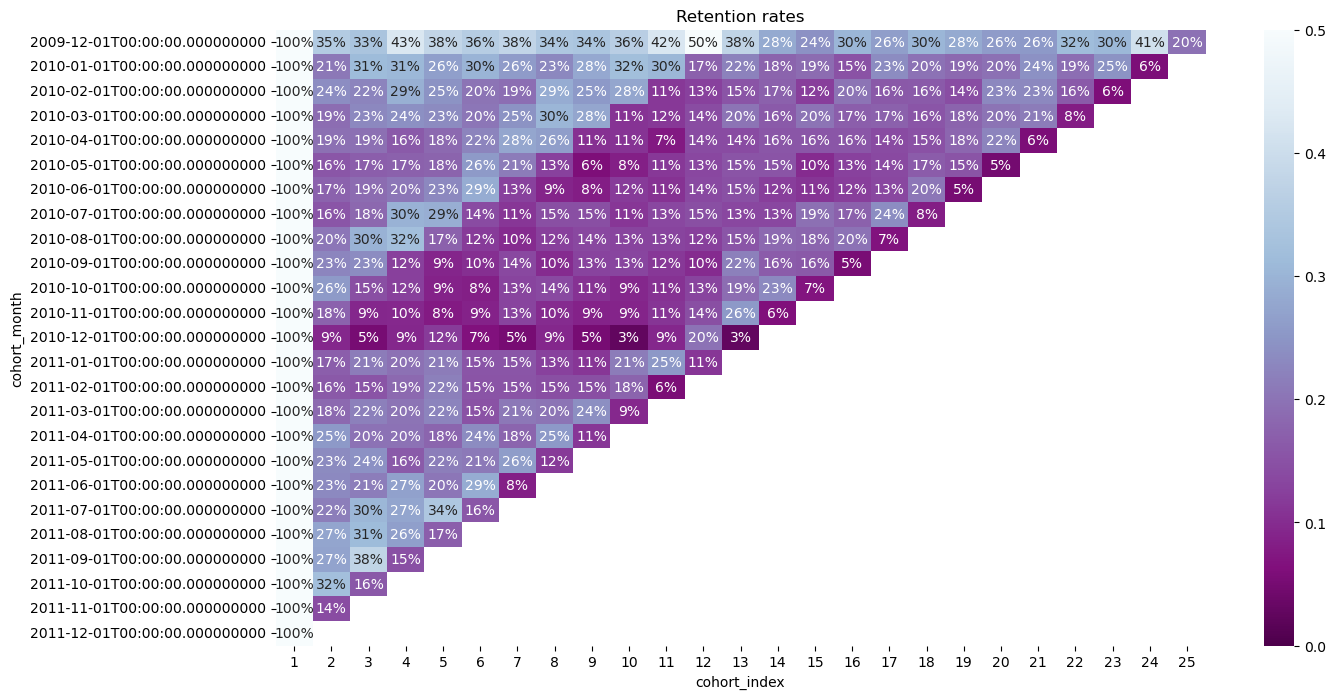

In [46]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()